In [3]:
import pandas as pd
import numpy as np
import sys 
import os
import glob
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
from scipy.stats import hypergeom

from matplotlib.collections import PatchCollection
from matplotlib.pyplot import figure

In [ ]:
##### This is the version 2 of the topic enrichment analysis
##### I think the previous version is too controvisal ...
##### This time I will just use the Itersection

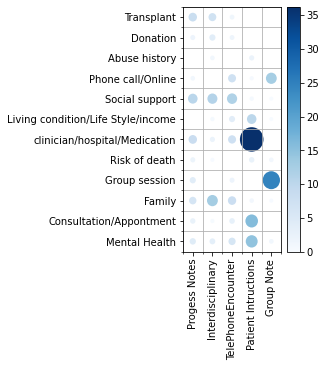

In [3]:
# get the csv

tsv = pd.read_csv('../../NLP/Social_notes_topiuc_modeling/Fig4_table.csv', index_col=0)



N = 12
M = 5
ylabels = tsv.index
xlabels = tsv.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
c = tsv.to_numpy()

fig, ax = plt.subplots()
fig.set_size_inches(2.2, 4.5, forward=True)
#r = c/c.max()/2
R = c/c.max()/2 +0.1
R[R==0.1] =0
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="Blues")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
plt.xticks(rotation = 90)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)

In [ ]:
# load a disease

In [6]:
topics = {'Mental Health':['mental', 'health', 'depression','anxiety', 'disorder','mood',
                          'psychological','physical','health','cognitive','emotional',
                           'mind','disease','psychiatric','disorders'],
          'Family':['family','parent', 'father', 'mother','child', 'children','sister',
                   'parents','relatives','clan','childhood','wealthy','group','friends'],
          'Consultation/Appontment':['appointment','consultation','consult','questionnaire','question',
                                    'advice','biographical','wikipedia','relevant','questions','know',
                                     'documentation','lists','care'],
          'Group session':['group','intervention', 'session','interpersonal'],
          'Risk of death':['sick','suicide', 'suicidal','risk','crisis'],
          'Clinician/Hospital/Medication':['patient','medication', 'hospital', 'medical',
                                           'clinic', 'clinician', 'treatment','therapy','surgery'],
          'Living condition/Life Style':['shelter','housing','house','living','sleep','bedtime'],
          'Social support':['social','service', 'support', 'referral',
                            'recommendation', 'recommend','worker', 'resource'],
          'Phone call/Online':['telehealth','phone','call','video'],
          'Abuse history':['abuse','history','child'],
          'Insurance/Income':['insurance', 'income', 'coverage', 'financial'],
         }

# Python program to illustrate the intersection
# of two lists in most simple way
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

##### Topic model reference! Don't change any of this!

topics = {'Mental Health':['mental', 'health', 'depression','anxiety', 'mood',
                          'psychological','physical','cognitive','emotional',
                           'mind','psychiatric'],
          'Family':['family','parent', 'father', 'mother','child', 'children','sister',
                   'parents','relatives','clan','childhood','friends'],
          'Consultation/Appontment':['appointment','consultation','consult','questionnaire','question',
                                    'advice','biographical','wikipedia','relevant','questions','know',
                                     'documentation'],
              'Group session':['group','intervention', 'session','interpersonal','company',
               'community','class','organization','together','part','minority','organisation'],
              'Risk of death':['suicide', 'suicidal','risk','crisis','homicide','murder',
               'commit','bombing','murdered','murders','bomber','killing','convicted','victims'],
              'Clinician/Hospital/Medication':['patient','medication', 'hospital', 'medical',
                                               'clinic', 'clinician', 'treatment','therapy','surgery',
                                              'symptoms','patients','drugs','diagnosis',
                                               'treatments','prescribed'],
              'Living condition/Life Style':['shelter','housing','house','living','sleep','bedtime',
                                            'building','retail','buildings','urban','employment',
                                             'suburban','campus','acres'],
              'Social support':['social','service', 'support', 'referral',
                                'recommendation', 'recommend','worker', 'resource',
                               'supports','provide','supporting','supported','allow',
                                'providing','assistance','benefit','help'],
              'Phone call/Online':['telehealth','phone','call','video', 'telephone','mobile',
                                 'wireless','gsm','cellular','dial','email','calling','networks',
                                  'calls','messages','telephones','internet'],
              'Abuse history':['abuse','history','addiction','alcohol','drugs','allegations',
                               'victim','violence','sexual','rape','dependence'],
              'Insurance/Income':['insurance', 'income', 'coverage', 'financial',
                                 'risks','contracts','banking','finance','care','liability','private'],
             }



In [31]:
topics = {'Mental Health':['mental', 'health', 'depression','anxiety', 'mood',
                          'psychological','physical','cognitive','emotional',
                           'mind','psychiatric'], # 11
          'Family':['family','parent', 'father', 'mother','child', 'children','sister',
                   'parents','relatives','clan','childhood','friends'], # 12
          'Consultation/Appontment':['appointment','consultation','consult','questionnaire','question',
                                    'advice','biographical','questions','know',
                                     'documentation'], #10
              'Group session':['group','intervention', 'session','interpersonal','company',
               'community','class','organization','together','part','minority','organisation'],
              'Risk of death':['suicide', 'suicidal','risk','crisis','homicide','murder',
               'commit','bombing','murdered','murders','bomber','killing','convicted','victims'],
              'Clinician/Hospital/Medication':['patient','medication', 'hospital', 'medical',
                                               'clinic', 'clinician', 'treatment','therapy','surgery',
                                              'symptoms','patients','drugs','diagnosis',
                                               'treatments','prescribed'],
              'Living condition/Life Style':['shelter','housing','house','living','sleep','bedtime',
                                            'building','retail','buildings','urban','employment',
                                             'suburban','campus','acres'],
              'Social support':['social','service', 'support', 'referral',
                                'recommendation', 'recommend','worker', 'resource',
                               'supports','provide','supporting','supported','allow',
                                'providing','assistance','benefit','help'],
              'Phone call/Online':['telehealth','phone','call','video', 'telephone','mobile',
                                 'wireless','gsm','cellular','dial','email','calling','networks',
                                  'calls','messages','telephones','internet'],
              'Abuse history':['abuse','history','addiction','alcohol','drugs','allegations',
                               'victim','violence','sexual','rape','dependence'],
              'Insurance/Income':['insurance', 'income', 'coverage', 'financial',
                                 'risks','contracts','banking','finance','care','liability','private'],
             }

# Python program to illustrate the intersection
# of two lists in most simple way
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [23]:
category_df= pd.DataFrame( index=list(topics.keys()))
topic_df = category_df.copy()

In [33]:
# Progress Notes

for i in range(1,6):
    table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_PN_unigram_16time'+str(i)+'.txt',
                        sep ='\t')
    words_table = table[[str(x) for x in range(1,11)]]
    total = []
    for x in range(words_table.shape[0]):
        for y in range(words_table.shape[1]):
             total.append(words_table.iloc[x,y])
    num_total = len(set(total))
    words_table = table[[str(x) for x in range(1,11)]]
    freq = table['Freq'].tolist()
    table['anno'] = ''
    for j in range(words_table.shape[0]):

        odds = []
        for label, words in enumerate(topics):
            overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
            missing_topic_words = len(words) - overlap
            missing_words_table = 10 - overlap
            overlap_ratio  = overlap/(len(words) + 10 - overlap)
            odds.append(overlap_ratio)

        if (max(odds) != 0) and (max(odds) <10000000):
            
            loc = np.where(np.asarray(odds) == max(odds))
            label = list(topics.keys())[loc[0][0]]
            table['anno'].iloc[j] = label

    print('Iteration '+ str(i))
    string = 'iteration_' + str(i)
    topic_df[string] = 0
    for name in topic_df.index:


        if len(table[table['anno']==name]['Freq'].tolist()) == 0:
            topic_df[string][name] = 0
        else:

            topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
category_df['Progress Notes'] = topic_df.mean(axis =1)


(array([3, 4]),)
(array([0, 4]),)
(array([2]),)
(array([4]),)
(array([7]),)
(array([0]),)
(array([10]),)
(array([1]),)
(array([3]),)
(array([7]),)
(array([1]),)
(array([5]),)
(array([4]),)
(array([7]),)
Iteration 1
(11, 1)
(array([7]),)
(array([4, 9]),)
(array([5]),)
(array([2]),)
(array([5]),)
(array([5]),)
(array([0]),)
(array([3]),)
(array([1]),)
(array([0]),)
(array([0, 9]),)
(array([2]),)
(array([1]),)
(array([0, 4]),)
(array([1]),)
Iteration 2
(11, 2)


/Users/ssun2/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([3]),)
(array([8]),)
(array([5]),)
(array([ 5, 10]),)
(array([9]),)
(array([0, 3, 4]),)
(array([7]),)
(array([ 5, 10]),)
(array([0]),)
(array([1]),)
(array([0]),)
(array([7]),)
(array([0]),)
(array([3]),)
(array([7]),)
Iteration 3
(11, 3)
(array([4]),)
(array([2]),)
(array([7]),)
(array([1]),)
(array([5]),)
(array([10]),)
(array([3]),)
(array([8]),)
(array([1]),)
(array([8]),)
(array([0]),)
(array([0]),)
(array([3]),)
(array([1]),)
(array([0, 4]),)
(array([7]),)
Iteration 4
(11, 4)
(array([5]),)
(array([5]),)
(array([0, 4]),)
(array([0, 9]),)
(array([0]),)
(array([6]),)
(array([3]),)
(array([0]),)
(array([3]),)
(array([7]),)
(array([1]),)
(array([1]),)
(array([0, 9]),)
(array([7]),)
Iteration 5
(11, 5)


In [28]:
max(odds)

0.045454545454545456

In [35]:

# InterD

for i in range(1,6):
    table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_InterD_unigram_16time'+str(i)+'.txt',
                        sep ='\t')
    words_table = table[[str(x) for x in range(1,11)]]
    total = []
    for x in range(words_table.shape[0]):
        for y in range(words_table.shape[1]):
             total.append(words_table.iloc[x,y])
    num_total = len(set(total))
    words_table = table[[str(x) for x in range(1,11)]]
    freq = table['Freq'].tolist()
    table['anno'] = ''
    for j in range(words_table.shape[0]):

        odds = []
        for label, words in enumerate(topics):
            overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
            missing_topic_words = len(words) - overlap
            missing_words_table = 10 - overlap
            overlap_ratio  = overlap/(len(words) + 10 - overlap)
            odds.append(overlap_ratio)

        if (max(odds) != 0) and (max(odds) <10000000):
            
            loc = np.where(np.asarray(odds) == max(odds))
            label = list(topics.keys())[loc[0][0]]
            table['anno'].iloc[j] = label

    print('Iteration '+ str(i))
    string = 'iteration_' + str(i)
    topic_df[string] = 0
    for name in topic_df.index:


        if len(table[table['anno']==name]['Freq'].tolist()) == 0:
            topic_df[string][name] = 0
        else:

            topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
    
category_df['Interdisciplinary'] = topic_df.mean(axis =1)


/Users/ssun2/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [36]:

# Telephone Encounter

for i in range(1,6):
    table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_unigram_tele16time'+str(i)+'.txt',
                        sep ='\t')
    words_table = table[[str(x) for x in range(1,11)]]
    total = []
    for x in range(words_table.shape[0]):
        for y in range(words_table.shape[1]):
             total.append(words_table.iloc[x,y])
    num_total = len(set(total))
    words_table = table[[str(x) for x in range(1,11)]]
    freq = table['Freq'].tolist()
    table['anno'] = ''
    for j in range(words_table.shape[0]):

        odds = []
        for label, words in enumerate(topics):
            overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
            missing_topic_words = len(words) - overlap
            missing_words_table = 10 - overlap
            overlap_ratio  = overlap/(len(words) + 10 - overlap)
            odds.append(overlap_ratio)

        if (max(odds) != 0) and (max(odds) <10000000):
            
            loc = np.where(np.asarray(odds) == max(odds))
            label = list(topics.keys())[loc[0][0]]
            table['anno'].iloc[j] = label

    print('Iteration '+ str(i))
    string = 'iteration_' + str(i)
    topic_df[string] = 0
    for name in topic_df.index:


        if len(table[table['anno']==name]['Freq'].tolist()) == 0:
            topic_df[string][name] = 0
        else:

            topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
    
category_df['TelephoneEncounter'] = topic_df.mean(axis =1)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [80]:
'''
# Patient Instructions

for i in range(1,6):
    table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_Instru_unigram_11time'+str(i)+'.txt',
                       sep ='\t')
    words_table = table[[str(x) for x in range(1,11)]]
    total = []
    for x in range(words_table.shape[0]):
        for y in range(words_table.shape[1]):
             total.append(words_table.iloc[x,y])
    num_total = len(set(total))

    words_table = table[[str(x) for x in range(1,11)]]
    freq = table['Freq'].tolist()
    table['anno'] = ''
    for j in range(words_table.shape[0]):

        odds = []
        for label, words in enumerate(topics):
            overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
            missing_topic_words = len(words) - overlap
            missing_words_table = 10 - overlap
            double_missing = num_total
            fish_table = np.array([[overlap,missing_topic_words],
                                       [missing_words_table,double_missing]])

            oddsr, p = fisher_exact(fish_table, alternative='greater')
            odds.append(oddsr)

        if max(odds) != 0:
            loc = np.where(odds == max(odds))
            label = list(topics.keys())[loc[0][0]]
            table['anno'].iloc[j] = label

    print('Iteration '+ str(i))
    string = 'iteration_' + str(i)
    topic_df[string] = 0
    print(topic_df.shape)
    for name in topic_df.index:


        if len(table[table['anno']==name]['Freq'].tolist()) == 0:
            topic_df[string][name] = 0
        else:

            topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
category_df['Patient Instructions'] = topic_df.mean(axis =1)
'''

Iteration 1
(11, 5)
Iteration 2
(11, 5)
Iteration 3
(11, 5)
Iteration 4
(11, 5)
Iteration 5
(11, 5)


In [37]:

# category
# Group Note

for i in range(1,6):
    table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_Gr_unigram_26time'+str(i)+'.txt',
                       sep ='\t')
    words_table = table[[str(x) for x in range(1,11)]]
    total = []
    for x in range(words_table.shape[0]):
        for y in range(words_table.shape[1]):
             total.append(words_table.iloc[x,y])
    num_total = len(set(total))
    words_table = table[[str(x) for x in range(1,11)]]
    freq = table['Freq'].tolist()
    table['anno'] = ''
    for j in range(words_table.shape[0]):

        odds = []
        for label, words in enumerate(topics):
            overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
            missing_topic_words = len(words) - overlap
            missing_words_table = 10 - overlap
            overlap_ratio  = overlap/(len(words) + 10 - overlap)
            odds.append(overlap_ratio)

        if (max(odds) != 0) and (max(odds) <10000000):
            
            loc = np.where(np.asarray(odds) == max(odds))
            label = list(topics.keys())[loc[0][0]]
            table['anno'].iloc[j] = label

    print('Iteration '+ str(i))
    string = 'iteration_' + str(i)
    topic_df[string] = 0
    for name in topic_df.index:


        if len(table[table['anno']==name]['Freq'].tolist()) == 0:
            topic_df[string][name] = 0
        else:

            topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
    
category_df['Group Note'] = topic_df.mean(axis =1)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [14]:
category_df

,Progress Notes,Interdisciplinary,TelephoneEncounter,Group Note
Mental Health,10.2,3.4,6.4,1.8
Family,7.0,15.6,10.6,20.0
Consultation/Appontment,2.6,0.0,1.4,0.0
Group session,9.0,0.0,1.0,20.2
Risk of death,5.8,0.6,0.0,0.0
Clinician/Hospital/Medication,2.0,4.0,1.6,2.2
Living condition/Life Style,0.2,0.0,0.4,0.0
Social support,10.0,13.2,15.8,0.2
Phone call/Online,1.4,1.8,6.8,3.6
Abuse history,1.6,1.0,3.8,0.0


In [38]:
category_df

,Progress Notes,Interdisciplinary,TelephoneEncounter,Group Note
Mental Health,10.2,4.4,6.4,1.4
Family,6.8,15.4,9.8,0.2
Consultation/Appontment,2.6,0.0,0.0,0.0
Group session,7.4,0.0,1.0,24.2
Risk of death,2.2,0.6,0.0,0.0
Clinician/Hospital/Medication,9.4,8.4,1.6,3.2
Living condition/Life Style,0.2,0.0,0.4,0.0
Social support,10.0,15.0,15.8,0.2
Phone call/Online,1.4,1.8,6.8,12.2
Abuse history,1.6,1.0,3.8,0.0


In [39]:
Disease_df = pd.DataFrame( index=list(topics.keys()))


In [42]:
Disease = ['Endocrine','Respiratory','Neoplasms','circulatory','digestive',
          'nervous','Pregnancy','musculoskeletal','immune','malformation']
Disease_df = pd.DataFrame( index=list(topics.keys()))
for term in Disease:
    topic_df = pd.DataFrame( index=list(topics.keys()))
    for i in range(1,6):
        
        #print(term)
        table = pd.read_csv('../../../../Box/NLP/Social_data/run_5/Topics_unigram_'+str(term)+'_20time'+str(i)+'.txt', sep ='\t')

        words_table = table[[str(x) for x in range(1,11)]]

        total = []
        for x in range(words_table.shape[0]):
            for y in range(words_table.shape[1]):
                total.append(words_table.iloc[x,y])
        num_total = len(set(total))

        words_table = table[[str(x) for x in range(1,11)]]
        freq = table['Freq'].tolist()
        table['anno'] = ''
        for j in range(words_table.shape[0]):

            odds = []
            for label, words in enumerate(topics):
                overlap = len(intersection(words_table.iloc[j].tolist(), topics[words]))
                missing_topic_words = len(words) - overlap
                missing_words_table = 10 - overlap
                oddsr = overlap/(overlap + missing_topic_words + missing_words_table)
                odds.append(oddsr)

            if max(odds) != 0:
                loc = np.where(np.asarray(odds) == max(odds))
                label = list(topics.keys())[loc[0][0]]
                table['anno'].iloc[j] = label

        #print('Iteration '+ str(i))
        string = 'iteration_' + str(i)
        topic_df[string] = 0
        #print(topic_df.shape)
        for name in topic_df.index:


            if len(table[table['anno']==name]['Freq'].tolist()) == 0:
                topic_df[string][name] = 0
            else:

                topic_df[string][name] = max(table[table['anno']==name]['Freq'].tolist())
    
    Disease_df[term] = topic_df.mean(axis =1)
    #print(Disease_df[term])

Disease_df.columns = ['Endocrine_nutritional_and_metabolic_diseases', 
'Diseases_of_the_respiratory_system',
'Neoplasms',
'Diseases_of_the_circulatory_system', 
'Diseases_of_the_digestive_system',
'Diseases_of_the_nervous_system',
'Pregnancy_childbirth_and_the_puerperium',
'Congenital_malformations_deformations_and_chromosomal_abnormalities',
'Diseases_of_the_blood_and_blood_forming_organs_and_disorders_involving_the_immune_mechanism',
'Congenital_malformations_deformations_chromosomal_abnormalities']

/Users/ssun2/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
Disease_df

,Endocrine_nutritional_and_metabolic_diseases,Diseases_of_the_respiratory_system,Neoplasms,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_nervous_system,Pregnancy_childbirth_and_the_puerperium,Congenital_malformations_deformations_and_chromosomal_abnormalities,Diseases_of_the_blood_and_blood_forming_organs_and_disorders_involving_the_immune_mechanism,Congenital_malformations_deformations_chromosomal_abnormalities
Mental Health,3.2,5.4,4.4,4.2,4.2,10.4,10.8,4.4,4.2,1.8
Family,11.4,16.2,14.2,11.4,14.0,8.8,14.6,12.6,16.4,20.0
Consultation/Appontment,0.4,0.0,0.0,0.0,0.0,0.8,0.2,0.2,0.0,0.2
Group session,0.8,1.4,0.4,1.0,1.2,2.8,0.4,2.0,1.0,0.4
Risk of death,0.0,0.8,0.0,0.0,0.6,0.6,0.6,0.0,0.0,0.0
Clinician/Hospital/Medication,5.2,2.8,4.6,5.0,1.2,2.6,0.8,5.6,9.2,1.0
Living condition/Life Style,0.2,0.4,0.4,0.2,0.0,0.8,0.0,0.2,0.0,0.2
Social support,16.8,15.2,19.8,14.4,20.6,17.6,15.2,14.8,13.2,15.0
Phone call/Online,0.6,0.0,0.2,0.0,0.6,2.0,0.6,2.6,1.2,0.0
Abuse history,1.4,0.4,0.8,3.0,2.2,0.6,1.0,0.4,2.4,0.8


In [20]:
Disease_df_norm  = (Disease_df-Disease_df.min())/(Disease_df.max()-Disease_df.min())
Disease_df_norm

,Endocrine_nutritional_and_metabolic_diseases,Diseases_of_the_respiratory_system,Neoplasms,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_nervous_system,Pregnancy_childbirth_and_the_puerperium,Congenital_malformations_deformations_and_chromosomal_abnormalities,Diseases_of_the_blood_and_blood_forming_organs_and_disorders_involving_the_immune_mechanism,Congenital_malformations_deformations_chromosomal_abnormalities
Mental Health,0.166667,0.234783,0.080808,0.277108,0.165049,0.405405,0.574468,0.310811,0.256098,0.085714
Family,0.794872,1.000000,0.717172,1.000000,0.766990,1.000000,1.000000,0.851351,1.000000,1.000000
Consultation/Appontment,0.153846,0.347826,0.191919,0.156627,0.000000,0.013514,0.010638,0.054054,0.000000,0.019048
Group session,0.153846,0.060870,0.020202,0.024096,0.077670,0.148649,0.021277,0.135135,0.060976,0.028571
Risk of death,0.000000,0.034783,0.000000,0.000000,0.029126,0.000000,0.042553,0.000000,0.000000,0.000000
Clinician/Hospital/Medication,0.333333,0.095652,0.232323,0.301205,0.048544,0.135135,0.000000,0.310811,0.560976,0.047619
Living condition/Life Style,0.012821,0.017391,0.020202,0.012048,0.000000,0.013514,0.000000,0.013514,0.000000,0.009524
Social support,1.000000,0.443478,1.000000,0.674699,1.000000,0.918919,0.446809,1.000000,0.756098,0.542857
Phone call/Online,0.038462,0.000000,0.010101,0.000000,0.029126,0.094595,0.031915,0.175676,0.073171,0.000000
Abuse history,0.089744,0.017391,0.040404,0.180723,0.106796,0.000000,0.053191,0.027027,0.146341,0.038095


In [23]:
category_df

,Progress Notes,Interdisciplinary,TelephoneEncounter,Group Note
Mental Health,10.2,3.4,6.4,1.8
Family,7.0,15.6,10.6,20.0
Consultation/Appontment,2.6,0.0,1.4,0.0
Group session,9.0,0.0,1.0,20.2
Risk of death,5.8,0.6,0.0,0.0
Clinician/Hospital/Medication,2.0,4.0,1.6,2.2
Living condition/Life Style,0.2,0.0,0.4,0.0
Social support,10.0,13.2,15.8,0.2
Phone call/Online,1.4,1.8,6.8,3.6
Abuse history,1.6,1.0,3.8,0.0


    """
    The hypergeometric distribution models drawing objects from a bin.
    - M is total number of objects
    - n is total number of Type I objects. 
    - x (random variate) represents the number of Type I objects in N drawn without replacement from the total population

    - http://en.wikipedia.org/wiki/Hypergeometric_distribution
    - https://www.biostars.org/p/66729/
    - http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.hypergeom.html
    - http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.hypergeometric.html
    - http://stackoverflow.com/questions/6594840/what-are-equivalents-to-rs-phyper-function-in-python
    """

<ipython-input-26-23411e1feb70>:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-26-23411e1feb70>:81: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


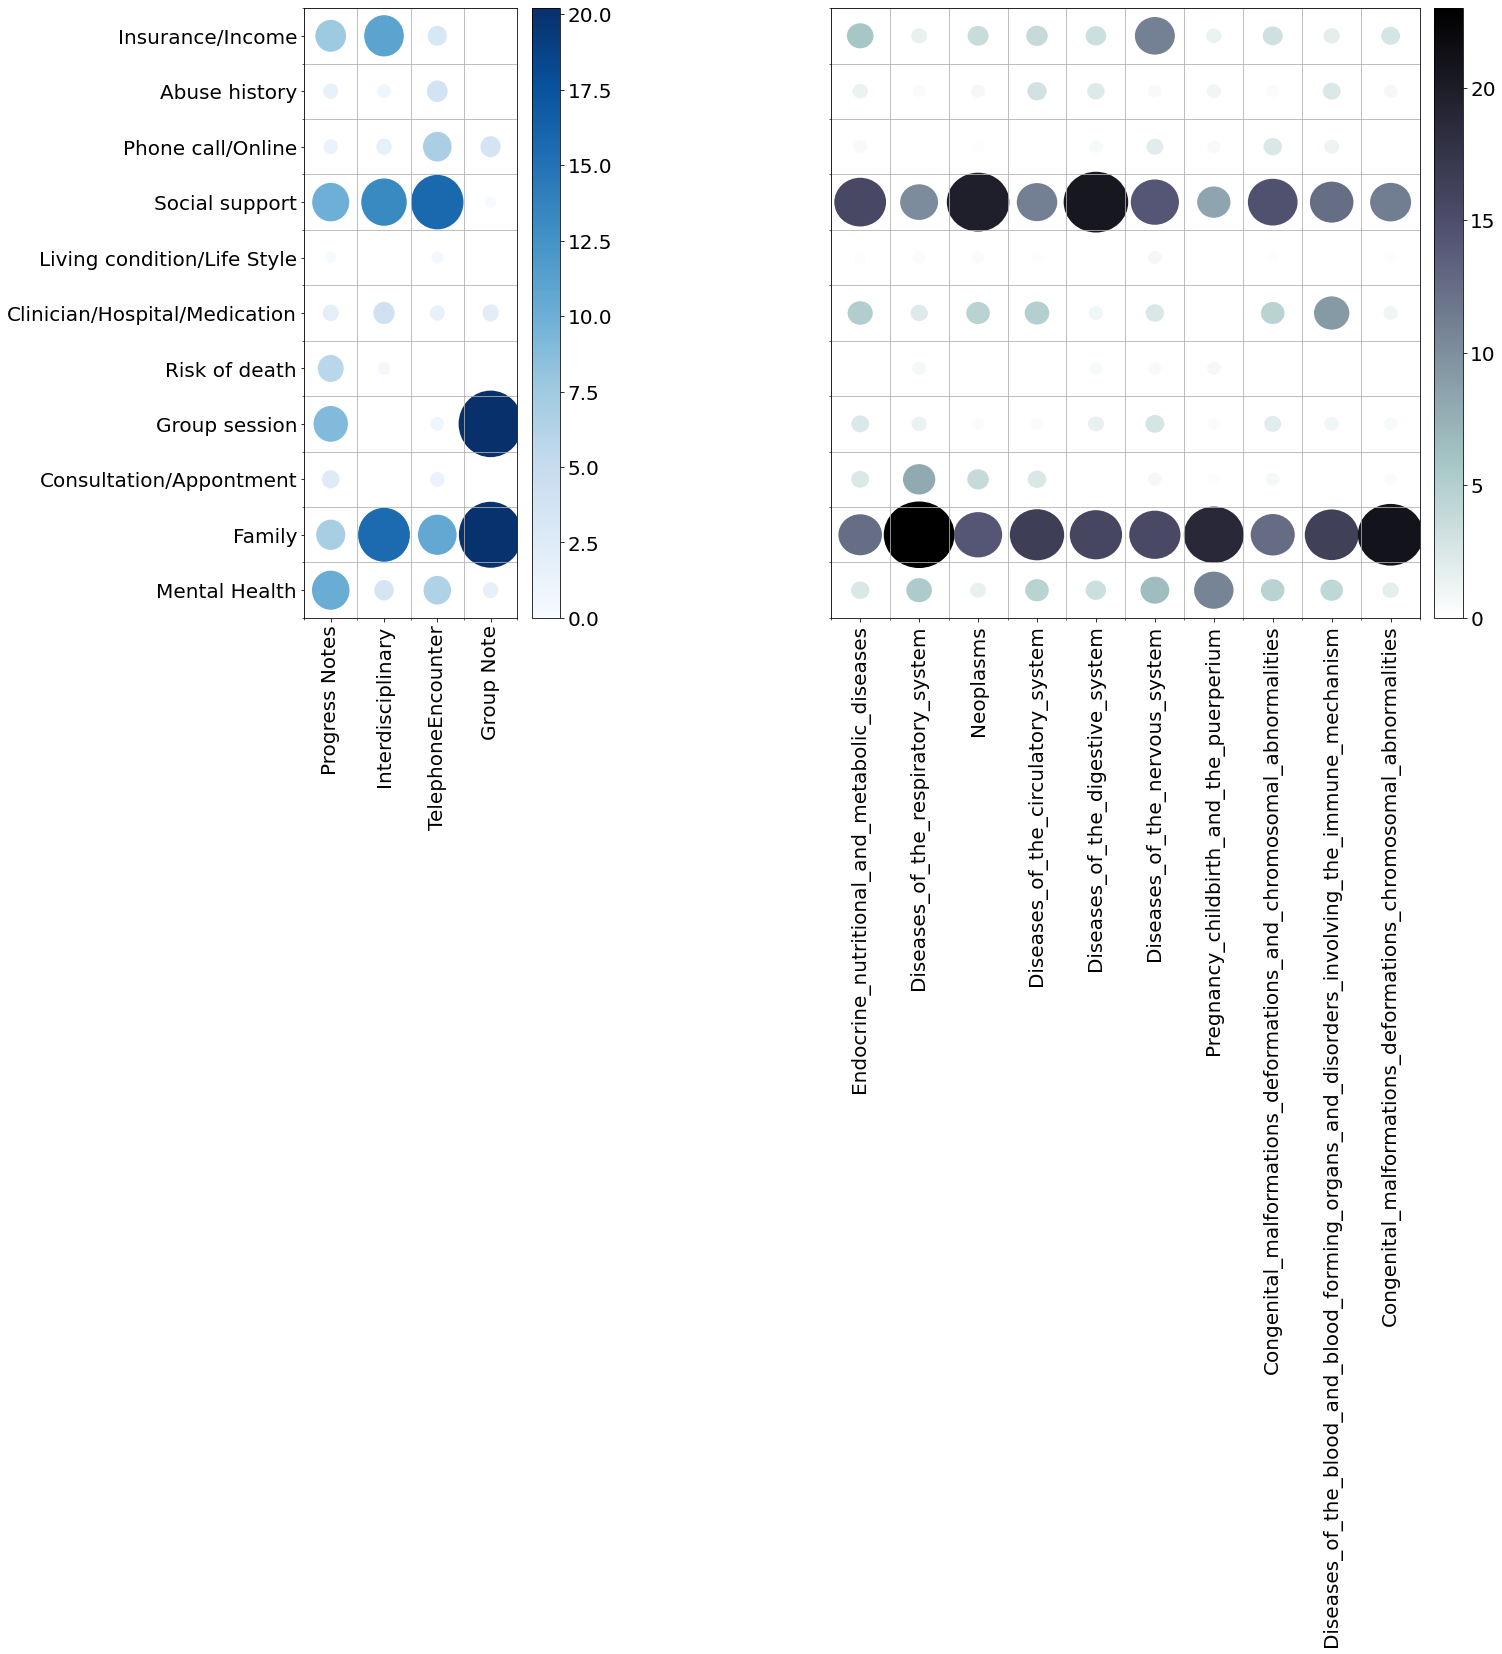

In [26]:
import matplotlib as mpl


# assemble figures 
fig = plt.figure(figsize=(20, 15))

# get the csv
if 1==1:
    
    ax1 = plt.subplot2grid((20, 15), (0, 0), colspan=3, rowspan = 15)
    
    xlabels = category_df.index 
    ylabels = category_df.columns

    M = len(ylabels)
    N = len(xlabels)

    ylabels = category_df.index
    xlabels = category_df.columns

    x, y = np.meshgrid(np.arange(M), np.arange(N))
    c = category_df.to_numpy()
    
    #r = c/c.max()/2
    R = c/c.max()/2 +0.1
    R[R==0.1] =0
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="Blues")
    ax1.add_collection(col)

    ax1.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax1.set_xticks(np.arange(M+1)-0.5, minor=True)
    plt.xticks(rotation = 90, size =20)
    plt.yticks(size =20)
    ax1.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax1.grid(which='minor')
    cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
    cbar = fig.colorbar(col, cax=cax)
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(20)

if 1==1:
    
    ax2 = plt.subplot2grid((20, 15), (0, 7), colspan=10, rowspan = 15)

    xlabels = Disease_df.index 
    ylabels = Disease_df.columns

    M = len(ylabels)
    N = len(xlabels)



    x, y = np.meshgrid(np.arange(M), np.arange(N))
    c = Disease_df.to_numpy()


    #r = c/c.max()/2
    R = c/c.max()/2 +0.1
    R[R==0.1] =0
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="bone_r")
    ax2.add_collection(col)

    ax2.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=ylabels, yticklabels=xlabels)
    ax2.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax2.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax2.grid(which='minor')
    plt.xticks(rotation = 90, size =20)
    plt.yticks([],size =20)
    #fig.colorbar(col,fontsize= 20 )
    cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
    #.colorbar(col, cax=cax) # Similar to fig.colorbar(im, cax = cax)
    cbar = fig.colorbar(col, cax=cax)
    
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(20)

fig.tight_layout()

#fig.savefig('./Fig5_v3.pdf')


<ipython-input-49-2f474913de0b>:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
<ipython-input-49-2f474913de0b>:81: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


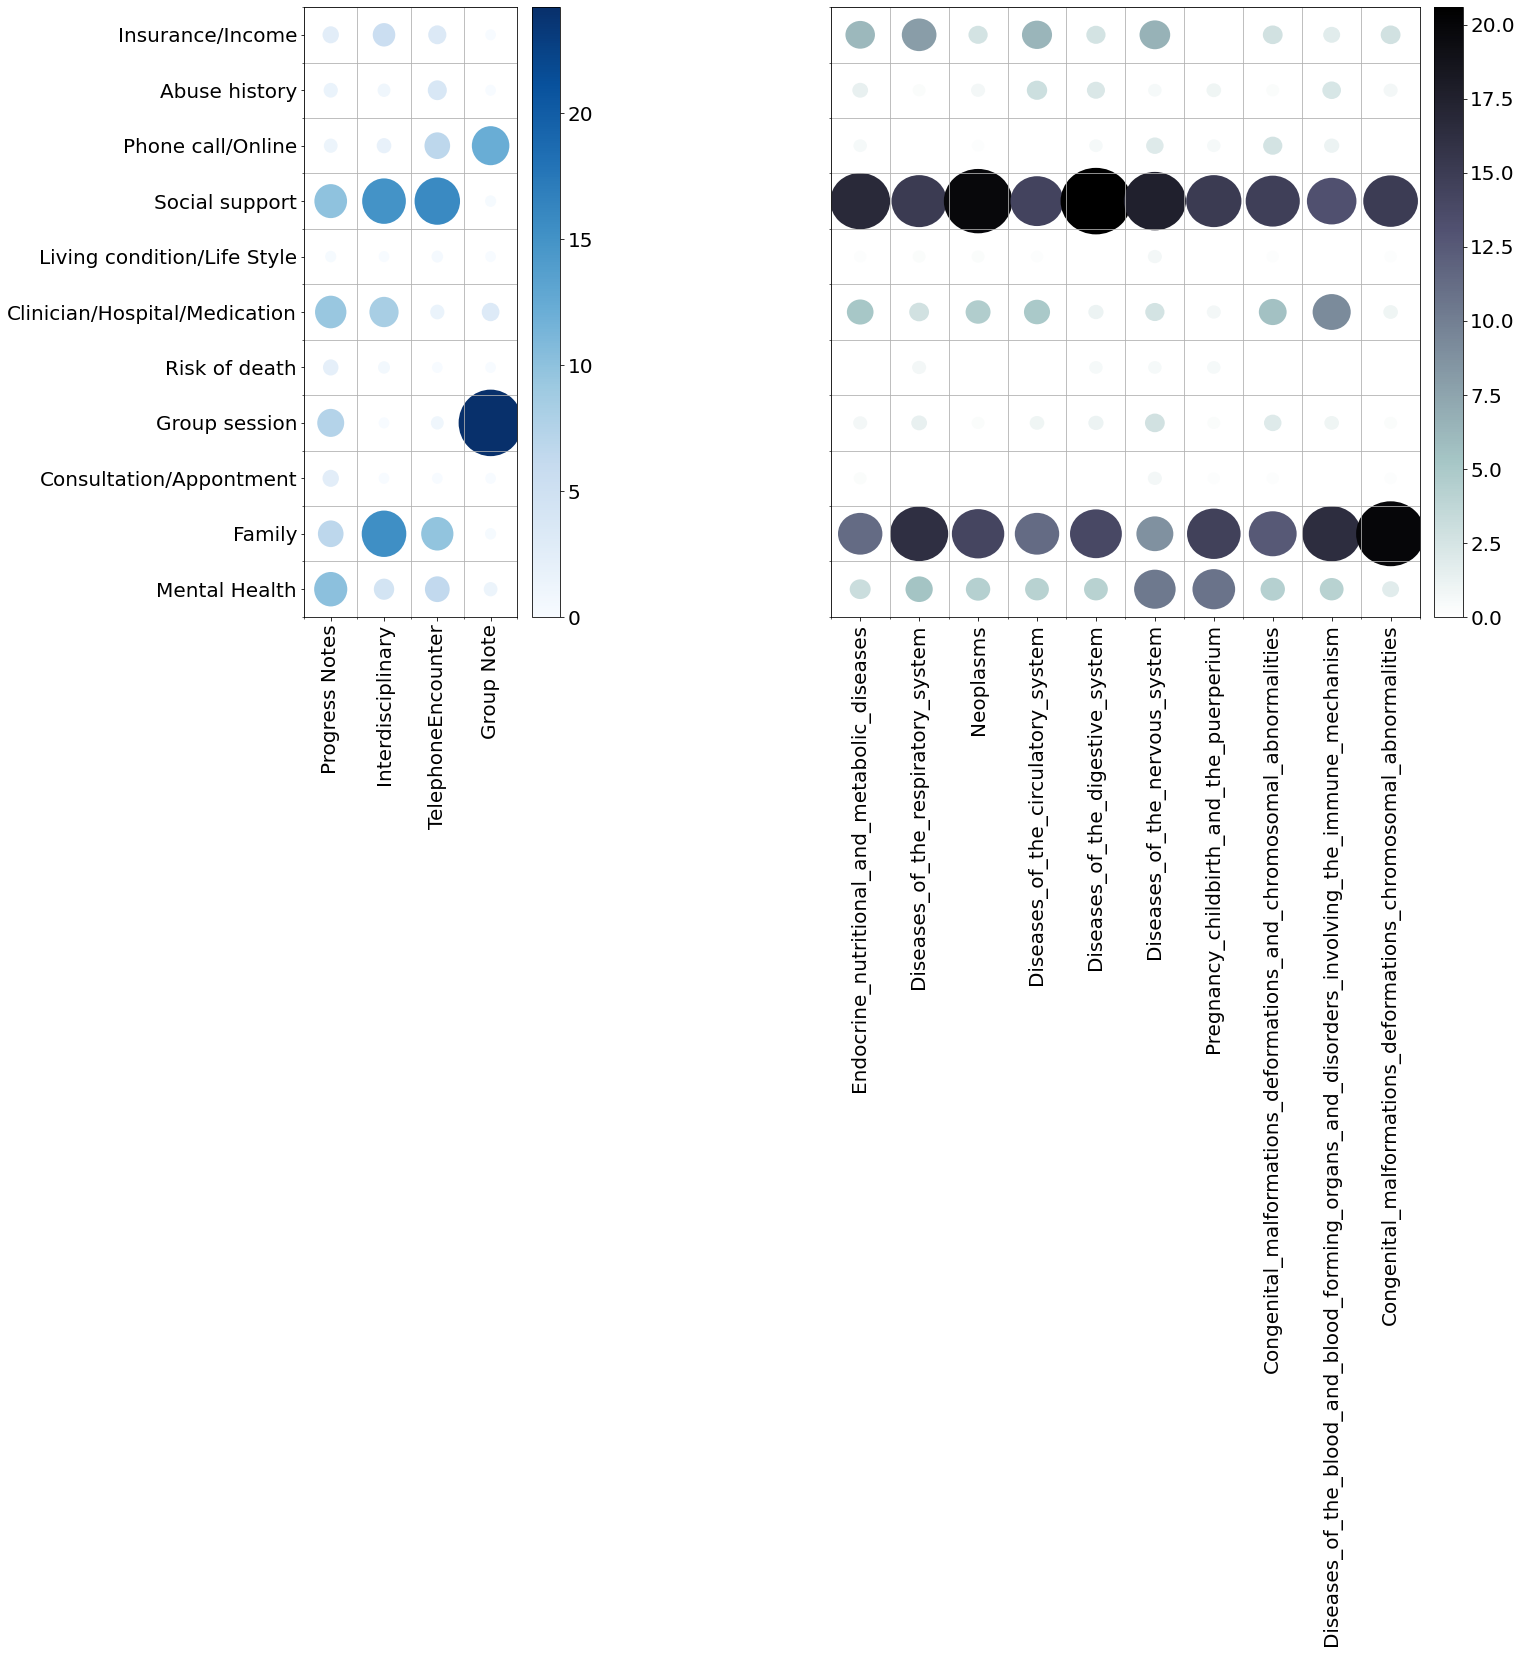

In [49]:
import matplotlib as mpl


# assemble figures 
fig = plt.figure(figsize=(20, 15))

# get the csv
if 1==1:
    
    ax1 = plt.subplot2grid((20, 15), (0, 0), colspan=3, rowspan = 15)
    
    xlabels = category_df.index 
    ylabels = category_df.columns

    M = len(ylabels)
    N = len(xlabels)

    ylabels = category_df.index
    xlabels = category_df.columns

    x, y = np.meshgrid(np.arange(M), np.arange(N))
    c = category_df.to_numpy()
    
    #r = c/c.max()/2
    R = c/c.max()/2 +0.1
    #R[R==0.1] =0
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="Blues")
    ax1.add_collection(col)

    ax1.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax1.set_xticks(np.arange(M+1)-0.5, minor=True)
    plt.xticks(rotation = 90, size =20)
    plt.yticks(size =20)
    ax1.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax1.grid(which='minor')
    cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
    cbar = fig.colorbar(col, cax=cax)
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(20)

if 1==1:
    
    ax2 = plt.subplot2grid((20, 15), (0, 7), colspan=10, rowspan = 15)

    xlabels = Disease_df.index 
    ylabels = Disease_df.columns

    M = len(ylabels)
    N = len(xlabels)



    x, y = np.meshgrid(np.arange(M), np.arange(N))
    c = Disease_df.to_numpy()


    #r = c/c.max()/2
    R = c/c.max()/2 +0.1
    #R[R==0.1] =0
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="bone_r")
    ax2.add_collection(col)

    ax2.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=ylabels, yticklabels=xlabels)
    ax2.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax2.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax2.grid(which='minor')
    plt.xticks(rotation = 90, size =20)
    plt.yticks([],size =20)
    #fig.colorbar(col,fontsize= 20 )
    cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
    #.colorbar(col, cax=cax) # Similar to fig.colorbar(im, cax = cax)
    cbar = fig.colorbar(col, cax=cax)
    
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(20)

fig.tight_layout()

fig.savefig('./Fig5_v4.pdf')